In [84]:
import torch
import pandas as pd
from run_grid_experiments import run_grid_experiments

In [85]:
seeds = list(range(5))
# n_inits = [2, 4, 8, 10]
n_inits = [10]
noise_levels = [1, 5, 10, 20]
noise_bools = [True, False]
budget = 30

sm_list = {}
df = pd.DataFrame(columns=["n_init", "noise_level", "seed", "noise_bool", "best"])
for noise_bool in noise_bools:
    for n_init in n_inits:
        for noise_level in noise_levels:
            sm_agg = torch.zeros((len(seeds), n_init+budget))
            for idx, seed in enumerate(seeds):
                X, Y, Y_real, model = torch.load(f"results/Schwe_n_init_{n_init}_noiselvl_{noise_level}_budget_{budget}_seed_{seed}_noise_{noise_bool}.pt")
                sliding_min = torch.zeros(Y.shape[0])
                for i in range(Y_real.shape[0]):
                    sliding_min[i] = Y_real[:i+1].min().item()
                
                sm_agg[idx] = sliding_min
                sm = pd.Series(sliding_min.numpy())
                
                df = pd.concat([df, pd.DataFrame({"n_init": [n_init], "noise_level": [noise_level], "seed": [seed], "noise_bool": [noise_bool],
                                                  "best": [sliding_min[-1].item()]})])
                
            sm_mean = sm_agg.mean(0)
            sm_std = sm_agg.std(0)
            sm_list[(n_init, noise_level, noise_bool)] = (sm_mean, sm_std)
df                

C:\Users\queim\AppData\Local\Temp\ipykernel_12420\2067356850.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({"n_init": [n_init], "noise_level": [noise_level], "seed": [seed], "noise_bool": [noise_bool],


,n_init,noise_level,seed,noise_bool,best
0,10,1,0,True,767.079651
0,10,1,1,True,767.079651
0,10,1,2,True,767.079651
0,10,1,3,True,767.079651
0,10,1,4,True,767.079651
0,10,5,0,True,767.079651
0,10,5,1,True,767.079651
0,10,5,2,True,767.079651
0,10,5,3,True,767.079651
0,10,5,4,True,767.079651


In [86]:
sm_list

{(10,
  1,
  True): (tensor([821.1638, 820.8365, 815.9865, 812.0001, 810.2044, 810.2044, 806.7228,
          806.7228, 806.7228, 806.7228, 800.8542, 791.7416, 791.2345, 791.2345,
          790.3158, 788.2984, 786.3238, 780.9172, 780.9172, 778.6176, 778.6176,
          773.8997, 767.0797, 767.0797, 767.0797, 767.0797, 767.0797, 767.0797,
          767.0797, 767.0797, 767.0797, 767.0797, 767.0797, 767.0797, 767.0797,
          767.0797, 767.0797, 767.0797, 767.0797, 767.0797]), tensor([19.0196, 19.2276, 13.5482, 13.4689, 12.4204, 12.4204,  7.4257,  7.4257,
           7.4257,  7.4257, 13.1364,  9.5984, 10.3388, 10.3388, 11.3995,  8.9474,
           7.4343,  4.9843,  4.9843,  8.0457,  8.0457, 10.1687,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000])),
 (10,
  5,
  True): (tensor([821.1638, 820.8365, 815.9865, 812.0001, 810.2044, 810.2044, 806.7228,
         

In [87]:

# slide_min line plot
import matplotlib.pyplot as plt

df_no_noise = df[df["noise_bool"] == False]
df_noise = df[df["noise_bool"] == True]



# # df = df.groupby(["n_init", "noise_level", "noise_bool"]).agg({"min": ["mean", "std"]})
df_no_noise = df_no_noise.groupby(["n_init", "noise_level"]).agg({"best": ["mean", "std"]})
df_noise = df_noise.groupby(["n_init", "noise_level"]).agg({"best": ["mean", "std"]})

# df_no_noise
df_noise

best     
                          mean  std
n_init noise_level                 
10     1            767.079651  0.0
       5            767.079651  0.0
       10           767.079651  0.0
       20           767.079651  0.0

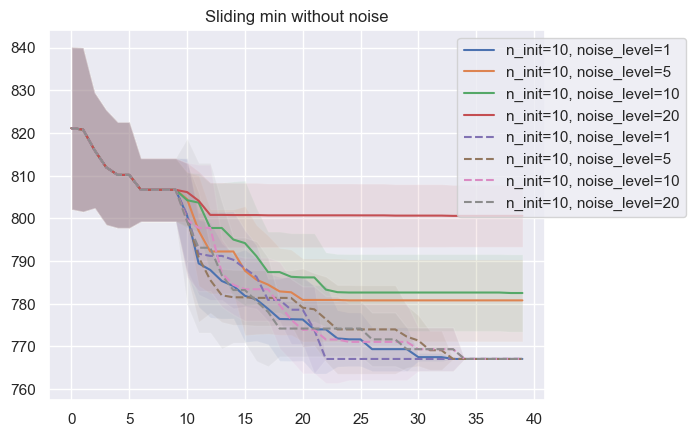

In [88]:

fig, ax = plt.subplots()

for idx, row in df_no_noise.iterrows():
    mean = sm_list[(idx[0], idx[1], False)][0]
    std = sm_list[(idx[0], idx[1], False)][1]
    plt.plot(mean, label=f"n_init={idx[0]}, noise_level={idx[1]}")
    plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.1)
    
for idx, row in df_noise.iterrows():
    mean = sm_list[(idx[0], idx[1], True)][0]
    std = sm_list[(idx[0], idx[1], True)][1]
    plt.plot(mean, label=f"n_init={idx[0]}, noise_level={idx[1]}", linestyle="--")
    plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.1)

# aaawaaay
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title("Sliding min  without noise")
plt.show()
